#**POS TAGGING USING HIDDEN MARKOV MODEL**

##**What is Hiden Markov Model?**
<br>
Hidden Markov model is an invisible Markov chain, and each state generates the random visible output.

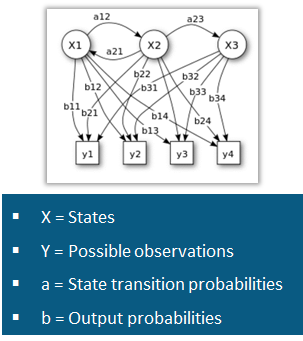

In [ ]:
!pip install pomegranate

##**Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
from itertools import chain
from collections import Counter, defaultdict,namedtuple
import collections
from pomegranate import State, HiddenMarkovModel, DiscreteDistribution
import random

#**PARTS OF SPEECH TAGGING USING HMM**


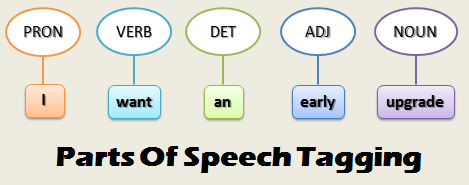
<br>
<br>
**Sentence for training purpose**




In [ ]:
#These sentences will be used for training the dataset
Sentence_1='Ram plays in parks' # Parks - Plural Noun
Sentence_2='Robert parks car at nights' # Verb

##**Split the training sentences**

In [ ]:
Sentence1_split=Sentence_1.split()
Sentence2_split=Sentence_2.split()
sentence1_tuple=tuple(Sentence1_split)
sentence2_tuple=tuple(Sentence2_split)

#**After spliting store all the splited sentence in a tuple**

##Sentence 1

In [ ]:
sentence1_tuple

('Ram', 'plays', 'in', 'parks')

##Sentence 2

In [ ]:
sentence2_tuple

('Robert', 'parks', 'car', 'at', 'nights')

##**Define Parts of speech (POS) for the above sentences**

image.png

In [ ]:
Sentence_1, Sentence_2

('Ram plays in parks', 'Robert parks car at nights')

In [ ]:
# Define POS for the above sentences
sentence1_POS='NOUN VERB MODIFIER NOUN'
sentence2_POS='NOUN VERB NOUN MODIFIER NOUN'

##Split all the POS

In [ ]:
sentence1_POS_split=sentence1_POS.split()
sentence2_POS_split=sentence2_POS.split()

##After spliting store all the splited POS in a tuple**

In [ ]:
sentence1_POS_tuple=tuple(sentence1_POS_split)
sentence2_POS_tuple=tuple(sentence2_POS_split)

In [ ]:
sentence1_POS_split

['NOUN', 'VERB', 'MODIFIER', 'NOUN']

In [ ]:
sentence2_POS_tuple

('NOUN', 'VERB', 'NOUN', 'MODIFIER', 'NOUN')

## Converting both the above POS tuples into lists
**we will get the list of Parts of Speech**


In [ ]:
# Converting both the above tuples into lists
POS_list=list(sentence1_POS_tuple+sentence2_POS_tuple)
POS_list

['NOUN',
 'VERB',
 'MODIFIER',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'MODIFIER',
 'NOUN']

## Converting both the above sentence tuples into lists
**we will get the list of words**


In [ ]:
words_list=list(sentence1_tuple+sentence2_tuple)
words_list

['Ram', 'plays', 'in', 'parks', 'Robert', 'parks', 'car', 'at', 'nights']

#**What is grams?**
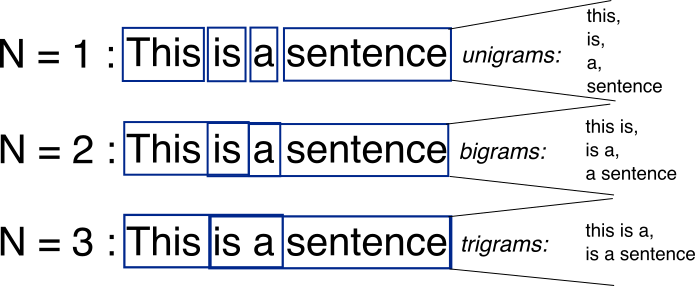

#**Make the unigrams function**

In [ ]:
# Count of unigrams - how many times each POS is occuring
def unigram_token(sequences):
    return Counter(sequences)

##Count of each POS

In [ ]:
POS_list

['NOUN',
 'VERB',
 'MODIFIER',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'MODIFIER',
 'NOUN']

In [ ]:
POS_ug = unigram_token(POS_list)
POS_ug

Counter({'MODIFIER': 2, 'NOUN': 5, 'VERB': 2})

In [ ]:
POS_count_ug = unigram_token(POS_list)
POS_count_ug

Counter({'MODIFIER': 2, 'NOUN': 5, 'VERB': 2})

#**Make the bigrams function**

In [ ]:
# Count of bigrams - how many times each pair of POS is occuring
def bigram_token(sequences):
    d = Counter(sequences)
    return d

##List of POS in bigrams

In [ ]:
POS_list

['NOUN',
 'VERB',
 'MODIFIER',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'MODIFIER',
 'NOUN']

In [ ]:
range_index = [(POS_list[i],POS_list[i+1]) for i in range(0,len(POS_list)-1,1)]
range_index

[('NOUN', 'VERB'),
 ('VERB', 'MODIFIER'),
 ('MODIFIER', 'NOUN'),
 ('NOUN', 'NOUN'),
 ('NOUN', 'VERB'),
 ('VERB', 'NOUN'),
 ('NOUN', 'MODIFIER'),
 ('MODIFIER', 'NOUN')]

##Count of each POS in bigrams

In [ ]:
for i in range(0,len(POS_list)-1,1):
    print((POS_list[i],POS_list[i+1]))

('NOUN', 'VERB')
('VERB', 'MODIFIER')
('MODIFIER', 'NOUN')
('NOUN', 'NOUN')
('NOUN', 'VERB')
('VERB', 'NOUN')
('NOUN', 'MODIFIER')
('MODIFIER', 'NOUN')


In [ ]:
POS_count_bg = bigram_token(range_index)
POS_count_bg

Counter({('MODIFIER', 'NOUN'): 2,
         ('NOUN', 'MODIFIER'): 1,
         ('NOUN', 'NOUN'): 1,
         ('NOUN', 'VERB'): 2,
         ('VERB', 'MODIFIER'): 1,
         ('VERB', 'NOUN'): 1})

#**Make the function to return start tag**

In [ ]:
# For getting the pairs of POS with Start tag
def start_POS_counts(sequences):
    n = Counter(sequences)
    return n

##List of start tag

In [ ]:
sentence1_POS_tuple

('NOUN', 'VERB', 'MODIFIER', 'NOUN')

In [ ]:
sentence2_POS_tuple

('NOUN', 'VERB', 'NOUN', 'MODIFIER', 'NOUN')

In [ ]:
start_POS_list = [sentence1_POS_tuple[0],sentence2_POS_tuple[0]]
start_POS_list

['NOUN', 'NOUN']

##POS count of start tag

In [ ]:
start_POS_count = start_POS_counts(start_POS_list)
start_POS_count

Counter({'NOUN': 2})

#**Make the function to return end tag**

In [ ]:
# For getting the pairs of POS with end tag
def end_POS_counts(sequences):
    n = Counter(sequences)
    return n

##List of end tag

In [ ]:
end_POS_list = [sentence1_POS_tuple[-1],sentence2_POS_tuple[-1]]
end_POS_list

['NOUN', 'NOUN']

##POS count of end tag

In [ ]:
end_POS_count = end_POS_counts(end_POS_list)
end_POS_count

Counter({'NOUN': 2})

##**Build a dictionary function with each POS and words associated with those POS**

Basically - we create hidden states (POS Tags) along with emission of Each Hidden state(word) 

In [ ]:
defaultdict

collections.defaultdict

In [ ]:
# Build a dictionary with each POS and words associated with those POS
def POS_word_count(POS, words):
    dDict = defaultdict(lambda: defaultdict(int)) # dict inside a dict
    for POS, word in zip(POS_list, words_list):
        dDict[POS][word] += 1
    return dDict

In [ ]:
defaultdict(int)

defaultdict(int, {})

In [ ]:
dDict = defaultdict(lambda: defaultdict(int))

In [ ]:
dDict["Hello"]["World"] = 1

In [ ]:
dDict

defaultdict(<function __main__.<lambda>>,
            {'Hello': defaultdict(int, {'World': 1})})

In [ ]:
dDict["Hello"]["World"] = 2

In [ ]:
dDict

defaultdict(<function __main__.<lambda>>,
            {'Hello': defaultdict(int, {'World': 2})})

In [ ]:
# Python program to demonstrate
# defaultdict
from collections import defaultdict
  
  
# Function to return a default
# values for keys that is not
# present
def def_value():
    return "Not Present"
      
# Defining the dict
d = defaultdict(def_value)
d["a"] = 1
d["b"] = 2
  
print(d["a"])
print(d["b"])
print(d["c"])

1
2
Not Present


In [ ]:
# Function to return a default
# values for keys that is not
# present
def def_value():
    return "Not Present"
      
# Defining the dict
d = {}
d["a"] = 1
d["b"] = 2
  
print(d["a"])
print(d["b"])
print(d["c"])

1
2


KeyError: ignored

#**Output**

In [ ]:
POS_words_count=POS_word_count(POS_list,words_list)
POS_words_count

defaultdict(<function __main__.POS_word_count.<locals>.<lambda>>,
            {'MODIFIER': defaultdict(int, {'at': 1, 'in': 1}),
             'NOUN': defaultdict(int,
                         {'Ram': 1,
                          'Robert': 1,
                          'car': 1,
                          'nights': 1,
                          'parks': 1}),
             'VERB': defaultdict(int, {'parks': 1, 'plays': 1})})

#**BUILD HIDDEN MARKOV MODEL**

In [ ]:
#Build Hidden Markov Model
hmm_model = HiddenMarkovModel(name="base-hmm-tagger")

#**Defining transition and emission probabilities in HMM**

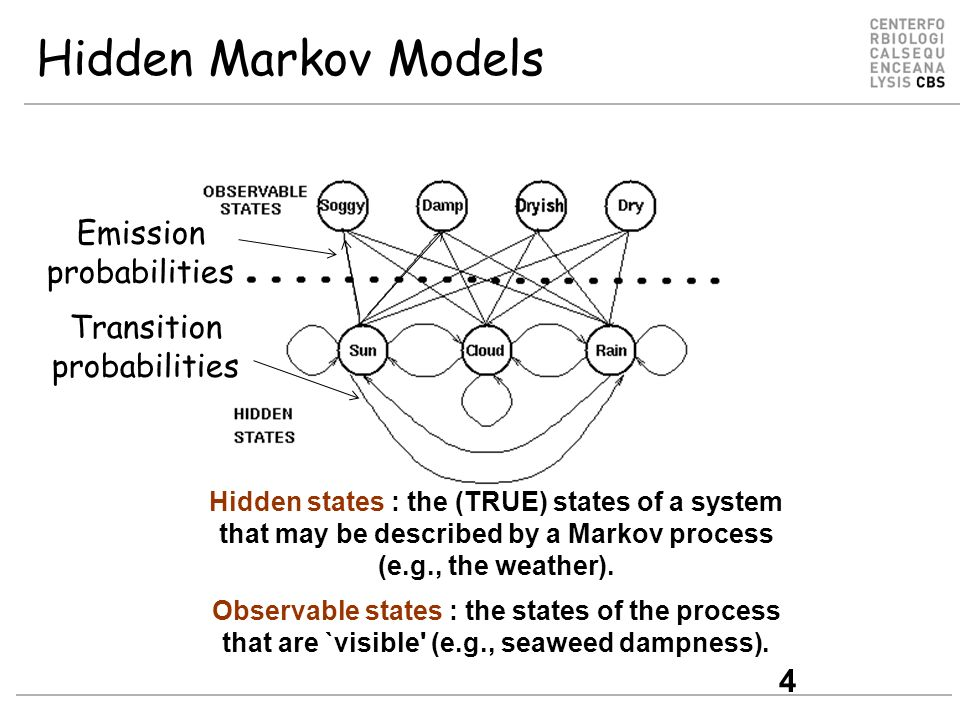

In [ ]:
POS_words_count.items()

dict_items([('NOUN', defaultdict(<class 'int'>, {'Ram': 1, 'parks': 1, 'Robert': 1, 'car': 1, 'nights': 1})), ('VERB', defaultdict(<class 'int'>, {'plays': 1, 'parks': 1})), ('MODIFIER', defaultdict(<class 'int'>, {'in': 1, 'at': 1}))])

In [ ]:
#Arrive at Emission probabilties 
to_states = []
for POS, words in POS_words_count.items():
    total = float(sum(words.values()))
    print('total',total)
    distribution = {word: count/total for word, count in words.items()}
    print('distribution',distribution)
    POS_emissions = DiscreteDistribution(distribution)
    print('POS_emissions',POS_emissions)
    POS_state = State(POS_emissions, name=POS)
    print('POS_state',POS_state)
    to_states.append(POS_state)

total 5.0
distribution {'Ram': 0.2, 'parks': 0.2, 'Robert': 0.2, 'car': 0.2, 'nights': 0.2}
POS_emissions {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution",
    "parameters" : [
        {
            "Ram" : 0.2,
            "parks" : 0.2,
            "Robert" : 0.2,
            "car" : 0.2,
            "nights" : 0.2
        }
    ],
    "frozen" : false
}
POS_state {
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "dtype" : "str",
        "name" : "DiscreteDistribution",
        "parameters" : [
            {
                "Ram" : 0.2,
                "parks" : 0.2,
                "Robert" : 0.2,
                "car" : 0.2,
                "nights" : 0.2
            }
        ],
        "frozen" : false
    },
    "name" : "NOUN",
    "weight" : 1.0
}
total 2.0
distribution {'plays': 0.5, 'parks': 0.5}
POS_emissions {
    "class" : "Distribution",
    "dtype" : "str",
    "name" : "DiscreteDistribution

In [ ]:
to_states

[{
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "Ram" : 0.2,
                 "parks" : 0.2,
                 "Robert" : 0.2,
                 "car" : 0.2,
                 "nights" : 0.2
             }
         ],
         "frozen" : false
     },
     "name" : "NOUN",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "plays" : 0.5,
                 "parks" : 0.5
             }
         ],
         "frozen" : false
     },
     "name" : "VERB",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : 

#**Calculate the start probability**

In [ ]:
POS_list

['NOUN',
 'VERB',
 'MODIFIER',
 'NOUN',
 'NOUN',
 'VERB',
 'NOUN',
 'MODIFIER',
 'NOUN']

In [ ]:
# Calculate start probability
hmm_model.add_states()
start_prob={}
for ps in POS_list:
    start_prob[ps]=start_POS_count[ps]/POS_count_ug[ps]

In [ ]:
POS_count_ug

Counter({'MODIFIER': 2, 'NOUN': 5, 'VERB': 2})

In [ ]:
print(start_prob)

{'NOUN': 0.4, 'VERB': 0.0, 'MODIFIER': 0.0}


#**Calculate end probability**

In [ ]:
to_states

[{
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "Ram" : 0.2,
                 "parks" : 0.2,
                 "Robert" : 0.2,
                 "car" : 0.2,
                 "nights" : 0.2
             }
         ],
         "frozen" : false
     },
     "name" : "NOUN",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : [
             {
                 "plays" : 0.5,
                 "parks" : 0.5
             }
         ],
         "frozen" : false
     },
     "name" : "VERB",
     "weight" : 1.0
 }, {
     "class" : "State",
     "distribution" : {
         "class" : "Distribution",
         "dtype" : "str",
         "name" : "DiscreteDistribution",
         "parameters" : 

In [ ]:
## Calculate end probability
for POS_state in to_states :
    hmm_model.add_transition(hmm_model.start,POS_state,start_prob[POS_state.name])

In [ ]:
end_prob={}

for ps in POS_list:
    end_prob[ps]=end_POS_count[ps]/POS_count_ug[ps]

In [ ]:
end_prob

{'NOUN': 0.4, 'VERB': 0.0, 'MODIFIER': 0.0}

##**Add transition states to the HMM model**

In [ ]:
# Add transition states to the HMM model
for POS_state in to_states :
    hmm_model.add_transition(POS_state,hmm_model.end,end_prob[POS_state.name])

#**Get the transitional probability**

In [ ]:
POS_count_bg.keys()

dict_keys([('NOUN', 'VERB'), ('VERB', 'MODIFIER'), ('MODIFIER', 'NOUN'), ('NOUN', 'NOUN'), ('VERB', 'NOUN'), ('NOUN', 'MODIFIER')])

In [ ]:
POS_count_bg.get(('NOUN', 'VERB'))/POS_count_ug["NOUN"]

0.4

In [ ]:
# Get the transitional probability 
transition_prob_POS_word={}
for key in POS_count_bg.keys():
    transition_prob_POS_word[key]=POS_count_bg.get(key)/POS_count_ug[key[0]]

In [ ]:
transition_prob_POS_word

{('MODIFIER', 'NOUN'): 1.0,
 ('NOUN', 'MODIFIER'): 0.2,
 ('NOUN', 'NOUN'): 0.2,
 ('NOUN', 'VERB'): 0.4,
 ('VERB', 'MODIFIER'): 0.5,
 ('VERB', 'NOUN'): 0.5}

## **NOTE:**
If a certain pair of POS don't occur in traning set, make them ZEROES. Since our training set is very less, this issue occurs


In [ ]:
# If a certain pair of POS don't occur in traning set, make them ZEROES. Since our training set is very less, this issue occurs
transition_prob_POS_word[('VERB', 'VERB')]=0
transition_prob_POS_word[('MODIFIER', 'VERB')]=0
transition_prob_POS_word[('MODIFIER', 'MODIFIER')]=0

#**Add transition probabilities to all POS tags**

In [ ]:
# Add transition probabilities to all POS
for POS_state in to_states :
    for next_POS_state in to_states :
        hmm_model.add_transition(POS_state,next_POS_state,transition_prob_POS_word[(POS_state.name,next_POS_state.name)])
hmm_model.bake()

#**Decode POS for a new sentence**

In [ ]:
# Decode POS for a new sentence
def POS_decoding(sentence, model):
    _, state_path = model.viterbi(sentence)
    return [state[1].name for state in state_path[1:-1]]

In [ ]:
POS_tags = POS_decoding(('Ram','parks','car','in','parks'), hmm_model)

#**OUPUT FOR TEST DATA**

In [ ]:
print('Parts of speech for Ram parks car in parks is:'+str(POS_tags))

Parts of speech for Ram parks car in parks is:['NOUN', 'VERB', 'NOUN', 'MODIFIER', 'NOUN']
